# Problem Statement

Given the Aerofit dataset with features such as 'Product', 'Age', 'Gender', 'Education', 'MaritalStatus', 'Usage', 'Fitness', 'Income', and 'Miles', the objective is to identify the characteristics of the target audience for each type of treadmill offered by the company. This will help the company provide better recommendations to new customers based on their demographic and usage patterns.

The business problem is to perform descriptive analytics to create a customer profile for each AeroFit treadmill product by developing appropriate tables and charts. For each AeroFit treadmill product, we need to construct two-way contingency tables and compute all conditional and marginal probabilities along with their insights/impact on the business.

This analysis will help Aerofit understand the characteristics of their target audience for each treadmill product and provide personalized recommendations to new customers. By identifying the factors that influence customer behavior, Aerofit can tailor their marketing and advertising strategies to improve customer engagement and sales. Additionally, this analysis can help Aerofit optimize their product offerings by identifying which products are popular among which demographics and usage patterns.

In [1]:
# download dataset 
# ! wget https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/125/original/aerofit_treadmill.csv?1639992749

In [2]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns


from sklearn.preprocessing import LabelEncoder

# Load Data

In [3]:
data = pd.read_csv('./aerofit_treadmill.csv_1639992749').iloc[:, ::-1]
data.head()

,Miles,Income,Fitness,Usage,MaritalStatus,Education,Gender,Age,Product
0,112,29562,4,3,Single,14,Male,18,KP281
1,75,31836,3,2,Single,15,Male,19,KP281
2,66,30699,3,4,Partnered,14,Female,19,KP281
3,85,32973,3,3,Single,12,Male,19,KP281
4,47,35247,2,4,Partnered,13,Male,20,KP281


In [4]:
data.columns

Index(['Miles', 'Income', 'Fitness', 'Usage', 'MaritalStatus', 'Education',
       'Gender', 'Age', 'Product'],
      dtype='object')

In [5]:
data.shape
# we have total of 180 records and 9 features

(180, 9)

# EDA

### Univariate Analysis

In [6]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Miles          180 non-null    int64 
 1   Income         180 non-null    int64 
 2   Fitness        180 non-null    int64 
 3   Usage          180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Education      180 non-null    int64 
 6   Gender         180 non-null    object
 7   Age            180 non-null    int64 
 8   Product        180 non-null    object
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


The dataset has 180 entries and 10 columns. The columns 'Age', 'Usage', 'Fitness', 'Income', 'Miles' and 'Education' are of integer data type, 
while the columns 'Gender', 'MaritalStatus', and 'Product' are of object data type. There are no null values in any of the columns.

Based on this analysis, we can further infer that the dataset has no missing values, which is a good sign. 
However, the categorical variables need to be converted to numerical values for any statistical analysis.Overall, 
data.info() provides a quick overview of the dataset's structure, data types, and missing values, allowing for an initial understanding of the data.

In [7]:
# Identify and Handle missing values 
data.isna().sum()

# as we see below we donot have any nan values 

Miles            0
Income           0
Fitness          0
Usage            0
MaritalStatus    0
Education        0
Gender           0
Age              0
Product          0
dtype: int64

In [8]:
# Overview of features with the datatype as object
data.describe(include = np.object_)

,MaritalStatus,Gender,Product
count,180,180,180
unique,2,2,3
top,Partnered,Male,KP281
freq,107,104,80


MaritalStatus
Partnered    0.594444
Single       0.405556
Name: MaritalStatus, dtype: float64
List of unique items : ['Single' 'Partnered']


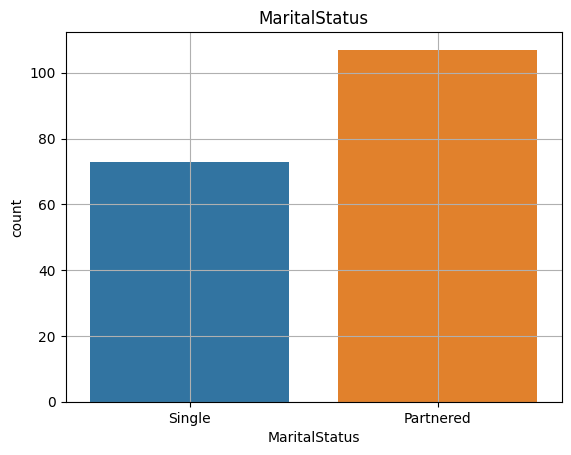

Gender
Male      0.577778
Female    0.422222
Name: Gender, dtype: float64
List of unique items : ['Male' 'Female']


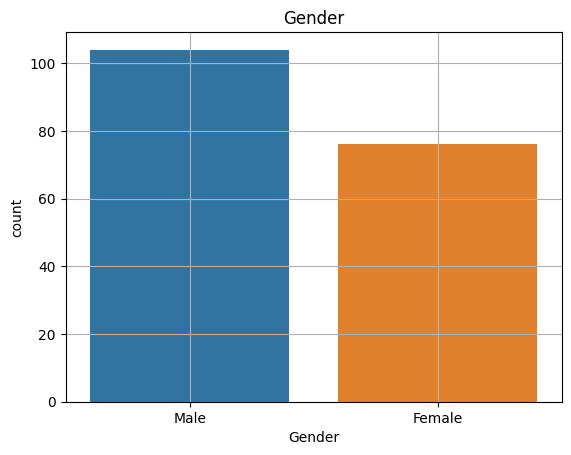

Product
KP281    0.444444
KP481    0.333333
KP781    0.222222
Name: Product, dtype: float64
List of unique items : ['KP281' 'KP481' 'KP781']


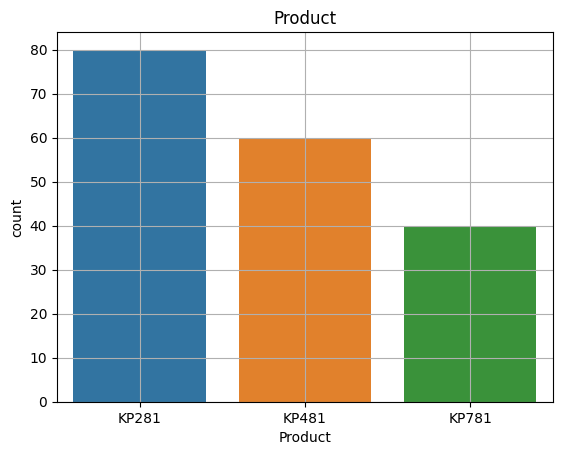

In [9]:
# Analise and count the number of unique values in each class of the feature  

for col_name in data.select_dtypes(np.object_).columns:
    print(col_name)
    print(data[col_name].value_counts(normalize= True))
    print(f'List of unique items : {data[col_name].unique()}')
    sns.countplot(data= data, x = col_name)
    plt.title(col_name)
    plt.grid(True)
    plt.show()

<b> Obervations </b>
1. <b> KP281 </b> is the most commonly used product.
2. The data contains more <b>males</b> than <b>females</b>.
3. There are more <b> Partnered </b> people in the data.

In [10]:
# Overview of features with the datatype as number
data.describe()

,Miles,Income,Fitness,Usage,Education,Age
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,103.194444,53719.577778,3.311111,3.455556,15.572222,28.788889
std,51.863605,16506.684226,0.958869,1.084797,1.617055,6.943498
min,21.000000,29562.000000,1.000000,2.000000,12.000000,18.000000
25%,66.000000,44058.750000,3.000000,3.000000,14.000000,24.000000
50%,94.000000,50596.500000,3.000000,3.000000,16.000000,26.000000
75%,114.750000,58668.000000,4.000000,4.000000,16.000000,33.000000
max,360.000000,104581.000000,5.000000,7.000000,21.000000,50.000000


Miles
MEAN --> 103.19444444444444
MEDIAN --> 94.0
MODE --> 85
STANDARD DEVIATION --> 51.86360466180931


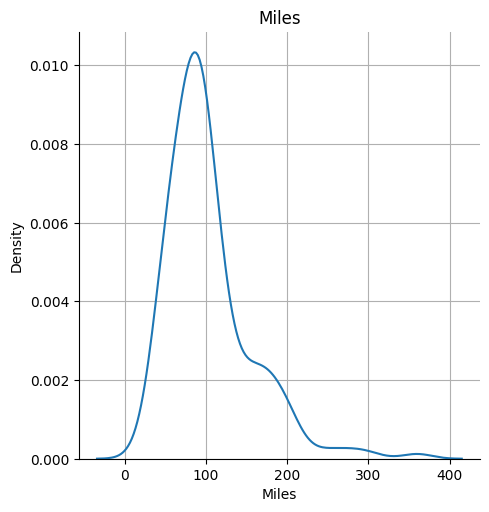

Income
MEAN --> 53719.57777777778
MEDIAN --> 50596.5
MODE --> 45480
STANDARD DEVIATION --> 16506.68422623862


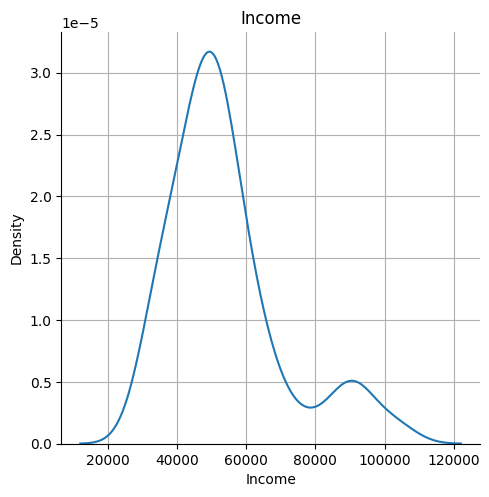

Fitness
MEAN --> 3.311111111111111
MEDIAN --> 3.0
MODE --> 3
STANDARD DEVIATION --> 0.958868565619312


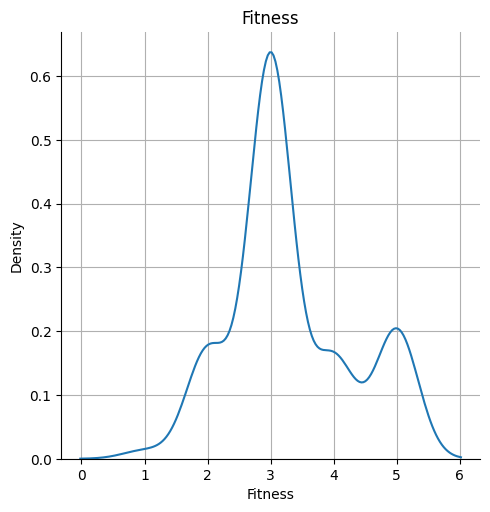

Usage
MEAN --> 3.4555555555555557
MEDIAN --> 3.0
MODE --> 3
STANDARD DEVIATION --> 1.0847970343962436


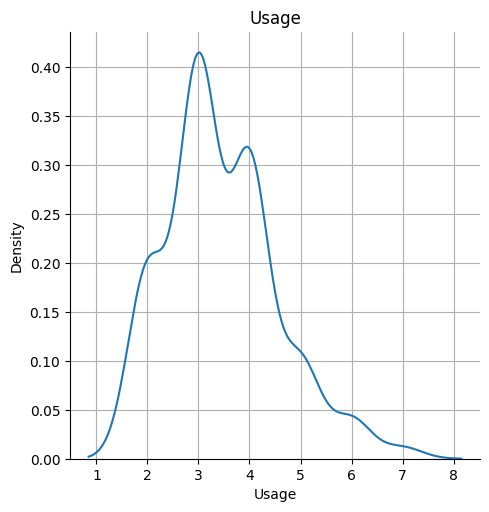

Education
MEAN --> 15.572222222222223
MEDIAN --> 16.0
MODE --> 16
STANDARD DEVIATION --> 1.6170548978065569


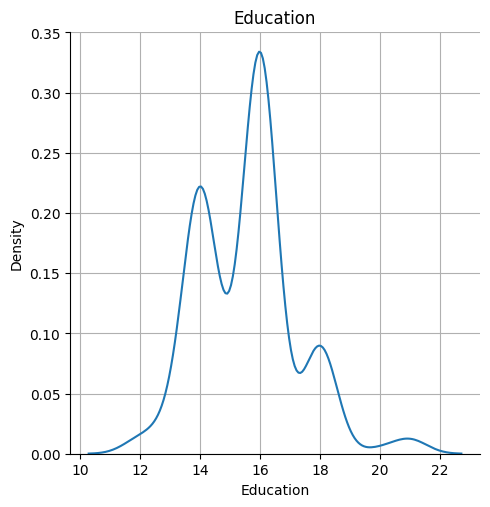

Age
MEAN --> 28.788888888888888
MEDIAN --> 26.0
MODE --> 25
STANDARD DEVIATION --> 6.943498135399795


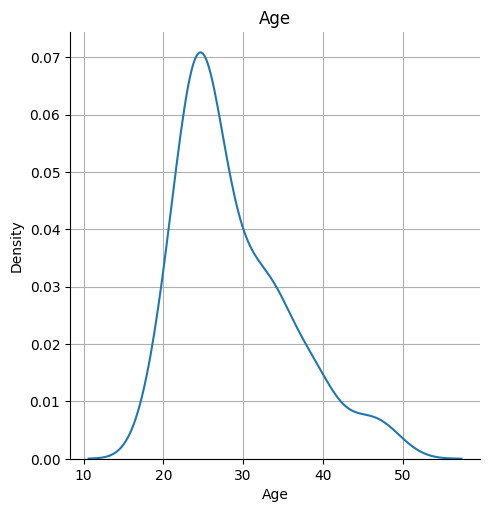

In [11]:
for col_name in data.select_dtypes(np.number).columns:
    print(col_name)
    print(f'MEAN --> {data[col_name].mean()}')
    print(f'MEDIAN --> {data[col_name].median()}')
    print(f'MODE --> {data[col_name].mode()[0]}')
    print(f'STANDARD DEVIATION --> {data[col_name].std()}')

    sns.displot(data= data, x = col_name, kind="kde")
    plt.title(col_name)
    plt.grid(True)
    plt.show()

In [12]:
data.describe(include="all")

,Miles,Income,Fitness,Usage,MaritalStatus,Education,Gender,Age,Product
count,180.000000,180.000000,180.000000,180.000000,180,180.000000,180,180.000000,180
unique,NaN,NaN,NaN,NaN,2,NaN,2,NaN,3
top,NaN,NaN,NaN,NaN,Partnered,NaN,Male,NaN,KP281
freq,NaN,NaN,NaN,NaN,107,NaN,104,NaN,80
mean,103.194444,53719.577778,3.311111,3.455556,NaN,15.572222,NaN,28.788889,NaN
std,51.863605,16506.684226,0.958869,1.084797,NaN,1.617055,NaN,6.943498,NaN
min,21.000000,29562.000000,1.000000,2.000000,NaN,12.000000,NaN,18.000000,NaN
25%,66.000000,44058.750000,3.000000,3.000000,NaN,14.000000,NaN,24.000000,NaN
50%,94.000000,50596.500000,3.000000,3.000000,NaN,16.000000,NaN,26.000000,NaN
75%,114.750000,58668.000000,4.000000,4.000000,NaN,16.000000,NaN,33.000000,NaN


<b >Observations: </b>


1. The data contains no missing values.

2. The dataset contains three distinct products.

3. The most common product is KP281.

4. The person's minimum and maximum ages are 18 and 50, respectively, the mean is 28.79, and 75% of people are under the age of 33.

5. The majority of people have completed 16 years of education, i.e. 75% of people have completed 16 years of education.

6. Out of 180 data points, 104 are male and the rest are female.

7. The standard deviation for Income and Miles is especially high. These variables may contain outliers.

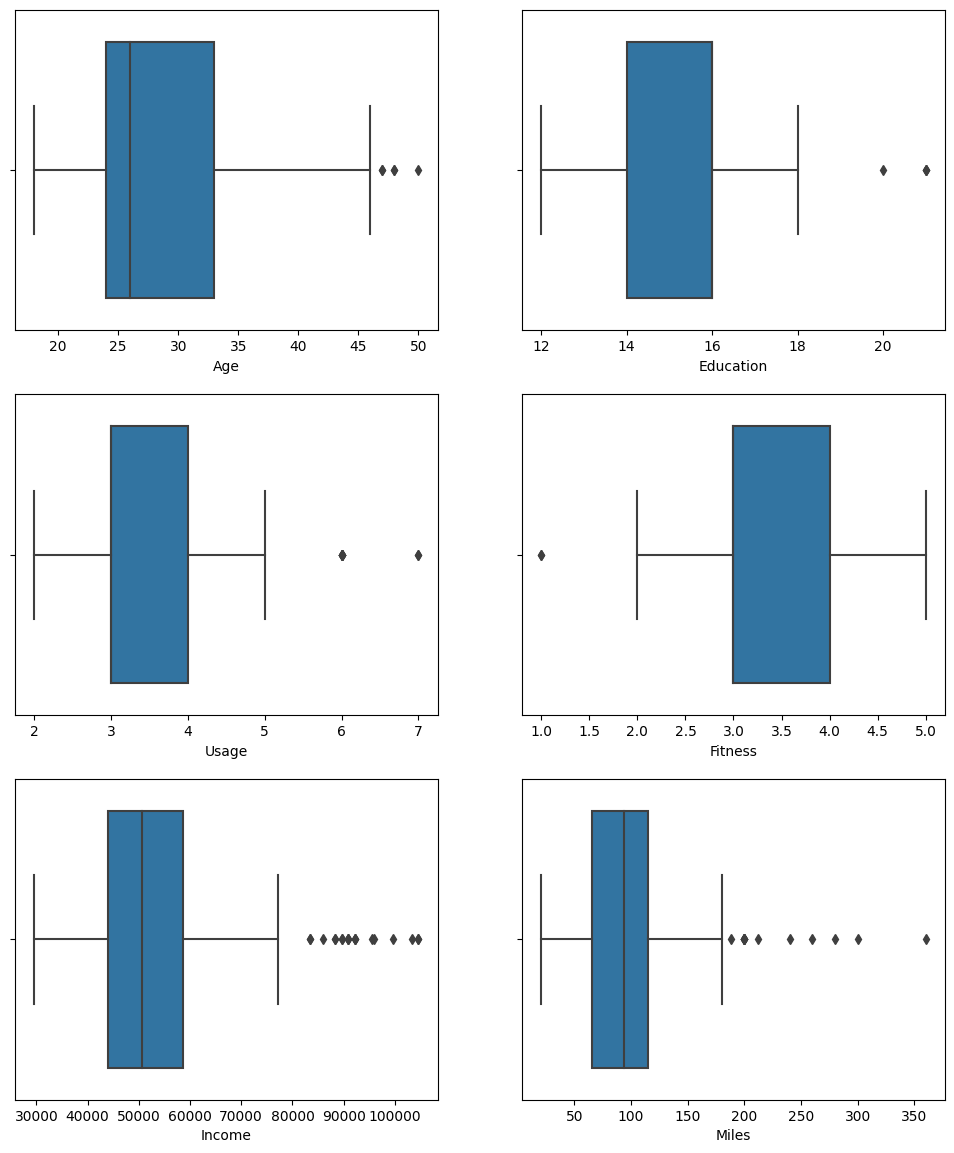

In [13]:
# Outlier Detection

fig, axis = plt.subplots(nrows=3, ncols=2, figsize=(12, 10))
fig.subplots_adjust(top=1.2)

sns.boxplot(data=data, x="Age", orient='h', ax=axis[0,0])
sns.boxplot(data=data, x="Education", orient='h', ax=axis[0,1])
sns.boxplot(data=data, x="Usage", orient='h', ax=axis[1,0])
sns.boxplot(data=data, x="Fitness", orient='h', ax=axis[1,1])
sns.boxplot(data=data, x="Income", orient='h', ax=axis[2,0])
sns.boxplot(data=data, x="Miles", orient='h', ax=axis[2,1])
plt.show()

<b> Obervation </b>

Even from the boxplots, it is obvious that:
1. There are very few outliers in age, education, and usage.
2. Whereas Income and Miles have more outliers.

### Bivariate Analysis

As per our problum statement we are trying to analise the customer base for vatious Product. 

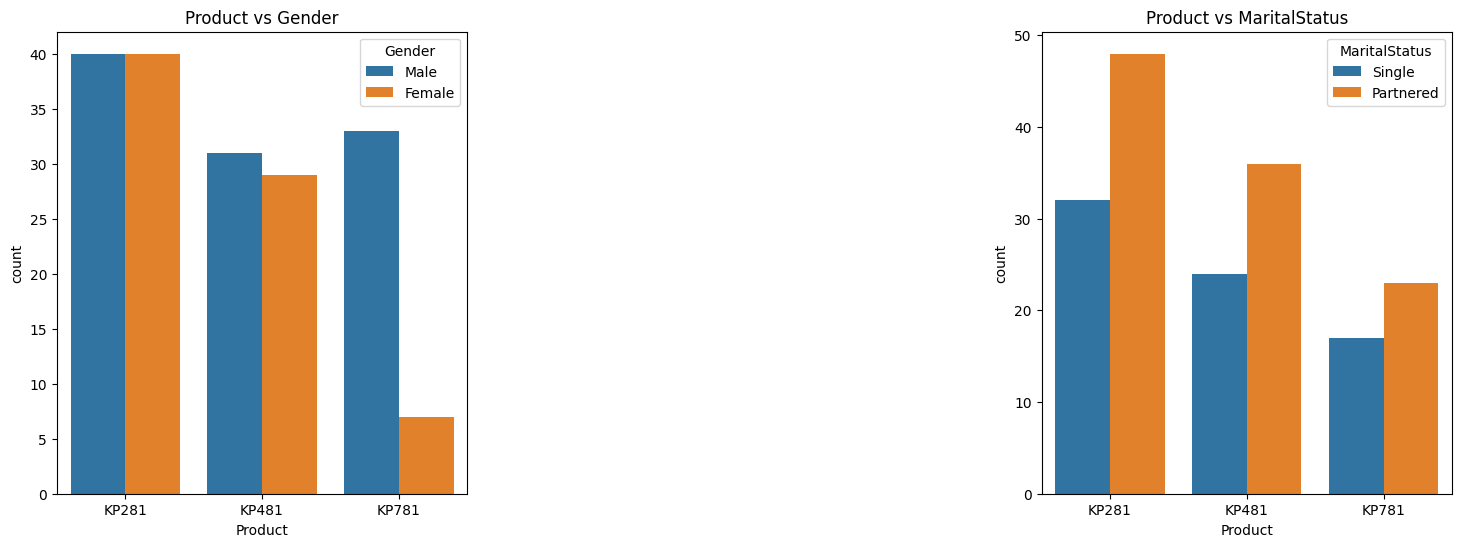

In [14]:
# lets see how the categorical features behaves i.e, Gender or MaritalStatus have any effect on the product purchased

plt.figure(figsize=(18,6))

plt.subplot(1,3, 1)
sns.countplot(data= data, x = 'Product',  hue = 'Gender')
plt.title('Product vs Gender')

plt.subplot(1,3, 3)
sns.countplot(data= data, x = 'Product',  hue = 'MaritalStatus')
plt.title('Product vs MaritalStatus')

plt.show()

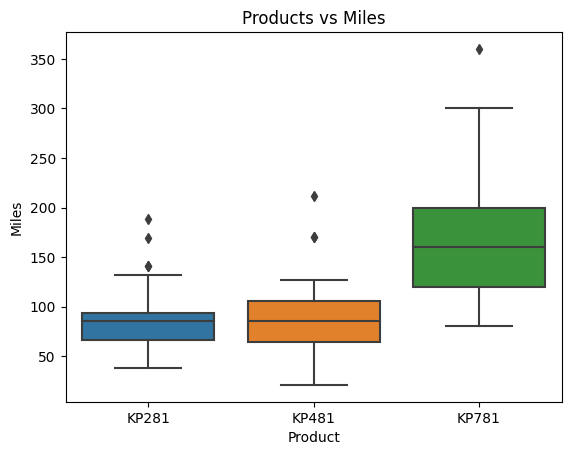

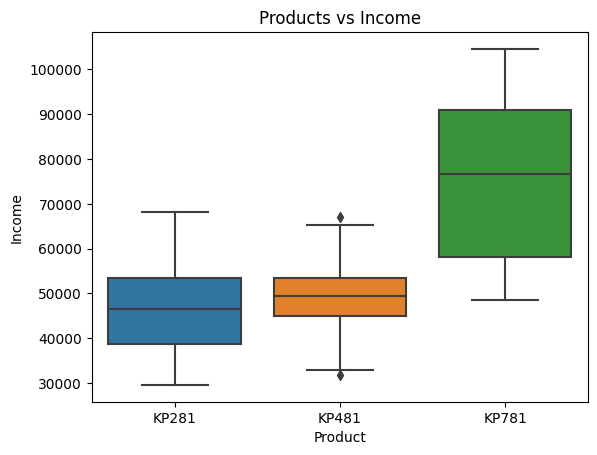

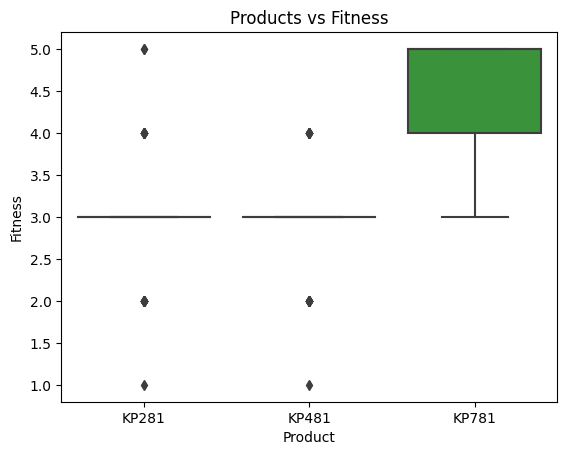

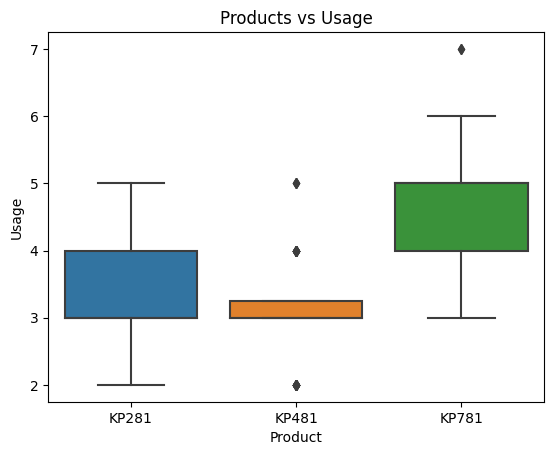

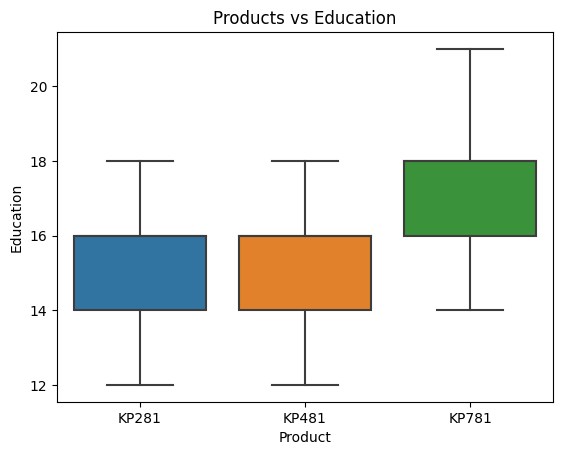

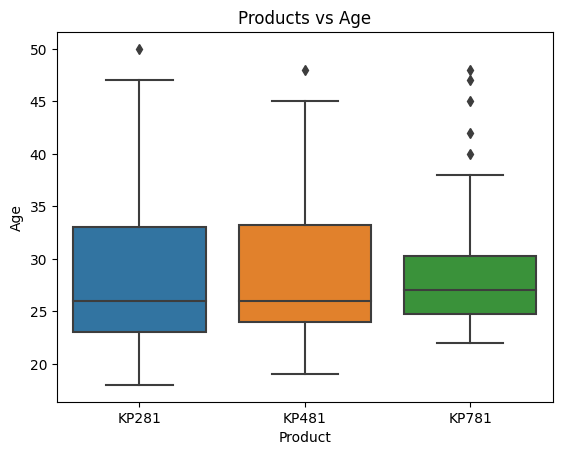

In [15]:
# lets see how the numerical features behaves i.e, 'Age', 'Education', 'Usage', 'Fitness', 'Income', 'Miles' have any effect on the product purchased 

for col_name in data.select_dtypes(np.number).columns:

    sns.boxplot(data= data, x = 'Product', y = col_name)
    plt.title(f'Products vs {col_name}')
    plt.show()

Observations

1. <b> Product vs. Age </b> <br>
Customers who buy products KP281 and KP481 have the same Age median value.
Customers aged 25 to 30 are more likely to purchase the KP781 product.

2. <b>  Product vs. Education </b>  <br>
Customers with a higher education level than 16 have a better chance of purchasing the KP781 product.
Customers with less than education level than 16  have an equal opportunity of purchasing KP281 or KP481.

3. <b>  Product vs. Usage </b> <br>
Customers who intend to use the treadmill more than four times per week are more likely to purchase the KP781.
While the other customers are more likely to buy KP281 or KP481.

4. <b>  Product vs. Fitness  </b> <br>
The more fit the customer is (fitness >= 3), the more likely the customer is to purchase the KP781 product.

5. <b>  Product vs. Income </b> <br>
The higher the customer's income (income >= 60000), the more likely the customer is to purchase the KP781 product.

6. <b>  Product vs. Miles  </b> <br>
If the customer expects to walk/run more than 120 miles per week, the KP781 product is more likely to be purchased.

In [16]:
# label encode categorical values 

# Label Encode the Values

# for every feature, we store the object of LabelEncoder
la_dct = {}

# iterate over every categorical columns 
for i in data.select_dtypes(np.object_).columns:
    
    # store the name of the feature as the key 
    # the object of the Labelencoder for that calss as a value
    la_dct[i] = LabelEncoder().fit(data[i].values)
    
    # Transform the data to numerical
    data[i] = la_dct[i].transform(data[i].values) 

<Figure size 1000x1000 with 0 Axes>

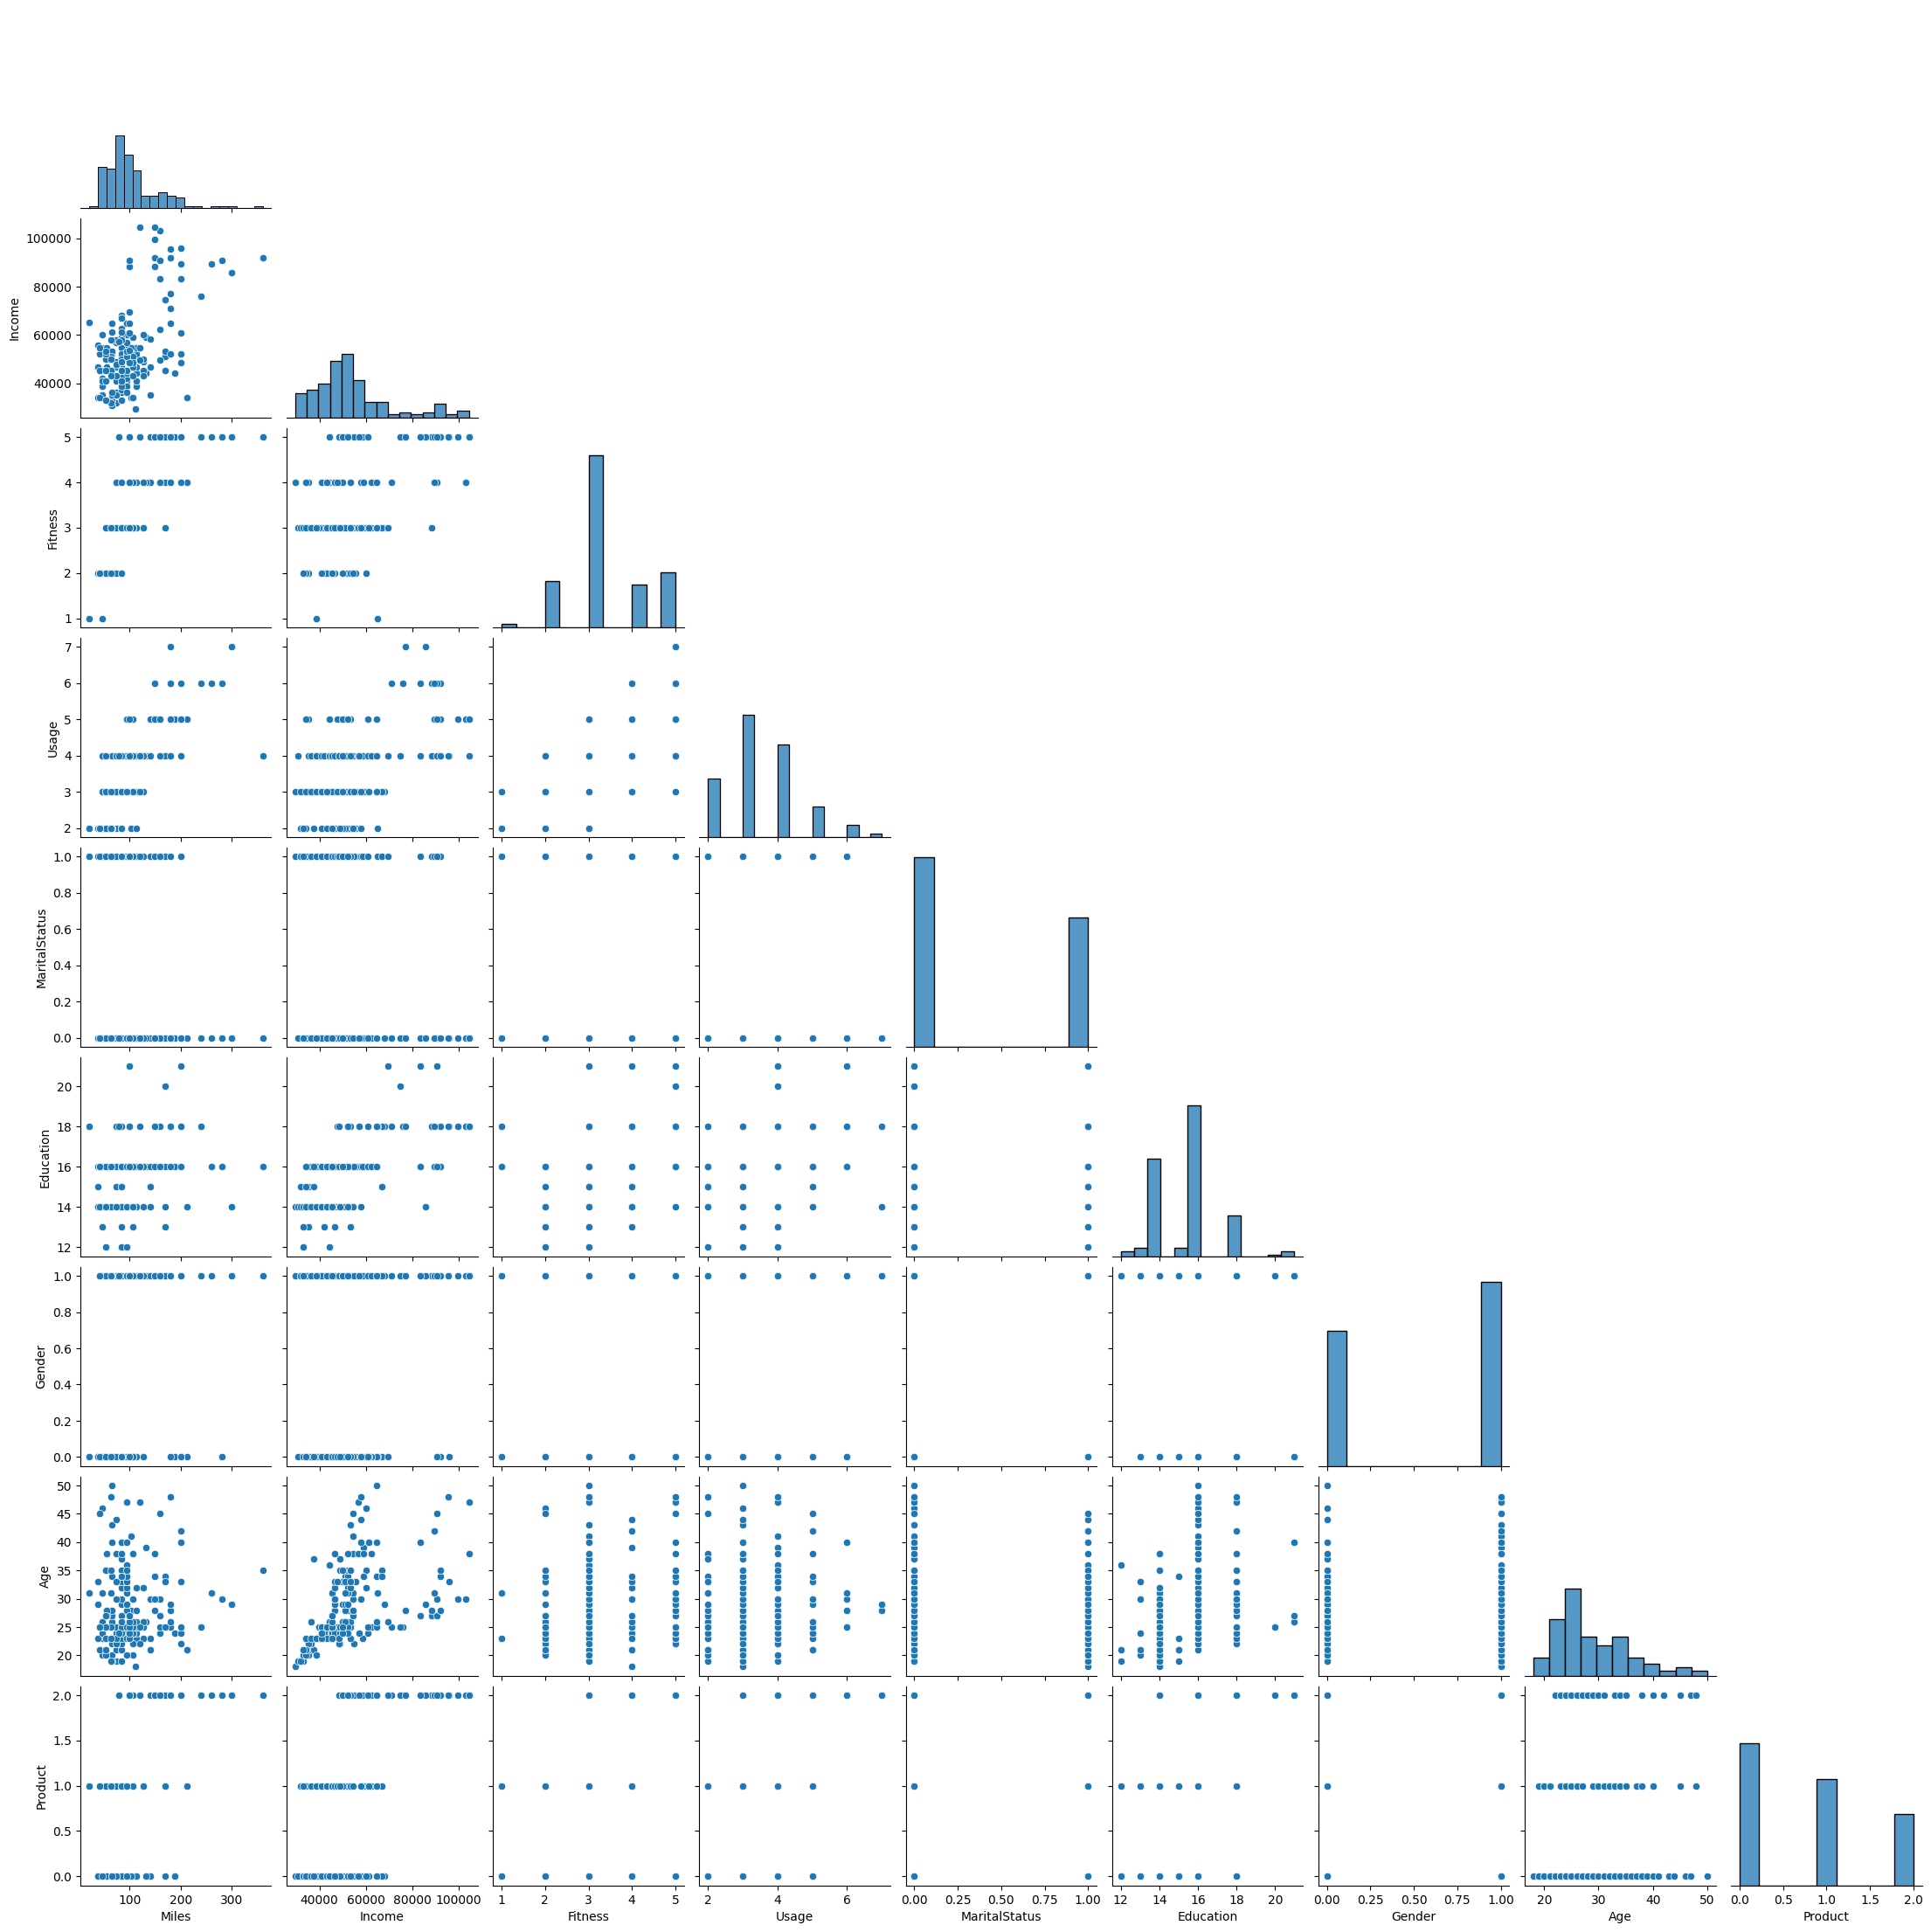

In [17]:
plt.figure(figsize = (10,10))
sns.pairplot(data, corner=True, )

plt.show()

<b> Observation </b>
1. The age distribution is slightly skewed towards younger customers, with the majority of customers in the age group of 25-35 years.

2. Customers with higher levels of education tend to have higher incomes.

3. There is a positive correlation between fitness and miles, indicating that customers who walk or run more miles each week tend to have higher fitness levels.

4. Customers who have a higher usage rate tend to have higher fitness levels.

5. There is no clear relationship between income and miles, indicating that income may not be a significant factor in the amount of physical activity customers engage in.

6. Customers who purchase more expensive products tend to have higher fitness levels.

<hr>

In conclusion, the pairplot analysis provides insights into the relationships between variables in the "Aerofit" dataset. The analysis indicates that there is a positive correlation between fitness and miles, and customers who have a higher usage rate tend to have higher fitness levels. Furthermore, customers who purchase more expensive products tend to have higher fitness levels, indicating that pricing strategies may play a role in promoting physical activity among customers.

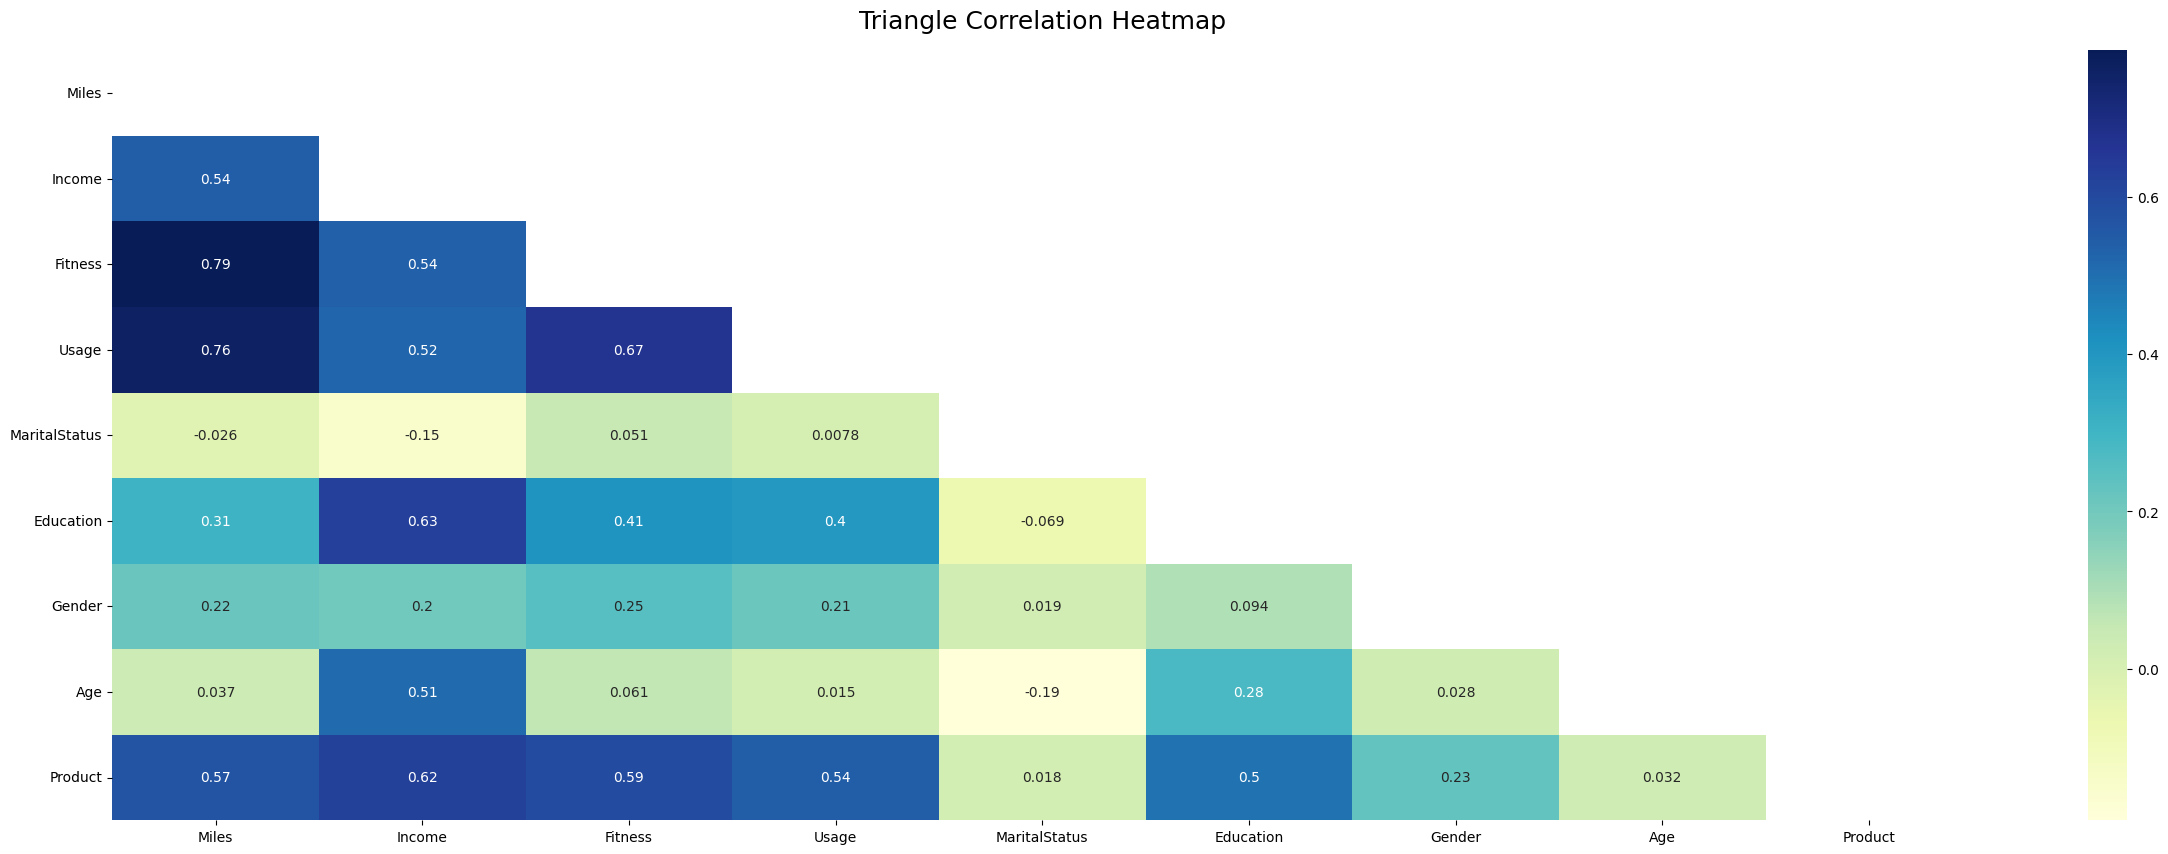

In [18]:
# Corelation Matrix

plt.figure(figsize = (30,10))

mask = np.triu(np.ones_like( data.corr(), dtype=np.bool))
heatmap = sns.heatmap(data.corr(), mask=mask, annot=True, cmap="YlGnBu")

heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16)
plt.yticks(rotation = 0)
plt.show()

<b> Observation </b>

1. Age vs. Usage: There is a weak negative correlation between age and usage. As age increases, usage decreases. This suggests that younger customers tend to use the fitness center more frequently than older customers.

2. Fitness vs. Miles: There is a strong positive correlation between fitness and miles. As fitness levels increase, the number of miles walked or run each week also increases. This indicates that customers who are more fit tend to engage in more physical activity.

3. Income vs. Education: There is a positive correlation between income and education. Customers with higher levels of education tend to have higher incomes. This suggests that education level is a significant factor in determining a customer's income.

4. Gender vs. Usage: There is no significant difference between male and female customers in terms of usage. Both genders tend to have similar levels of usage.

5. Gender vs. Fitness: There is no significant difference between male and female customers in terms of fitness levels. Both genders tend to have similar levels of fitness.

6. MaritalStatus vs. Income: There is no significant difference in income between married and single customers. Both marital status categories tend to have similar income levels.

7. MaritalStatus vs. Usage: There is no significant difference in usage between married and single customers. Both marital status categories tend to have similar levels of usage.

<hr>

The correlation matrix shows that the 'Product' has a weak positive correlation with all the features, with the highest correlation being with Income (0.62), 'Miles' (0.57) and 'Fitness' (0.59). This suggests that customers who walk or run more miles each week and have higher fitness levels with high income tend to use/ buy this product . 

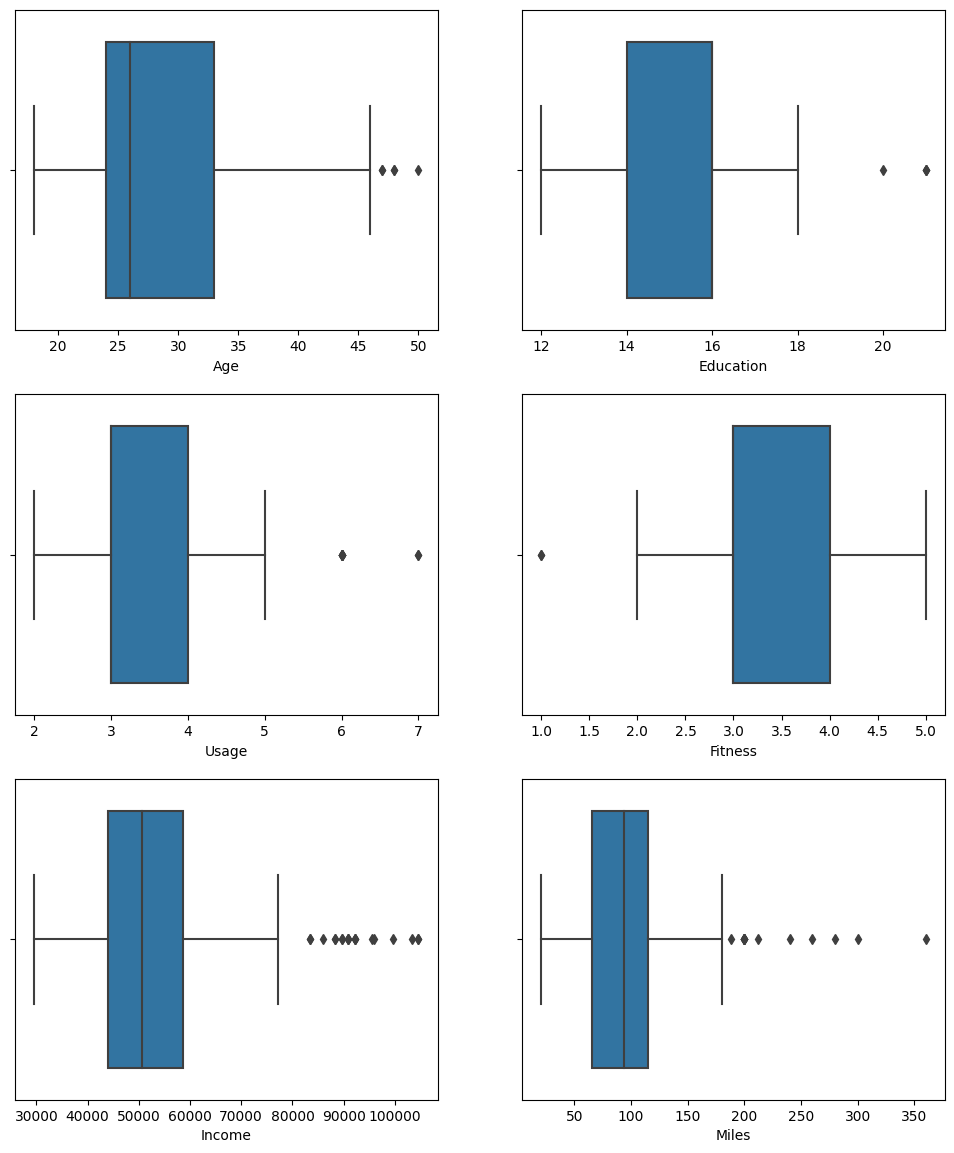

In [31]:
# handle outliers 

# Using Boxplot to display outliers present in the dataset

fig, axis = plt.subplots(nrows=3, ncols=2, figsize=(12, 10))
fig.subplots_adjust(top=1.2)

sns.boxplot(data=data, x="Age", orient='h', ax=axis[0,0])
sns.boxplot(data=data, x="Education", orient='h', ax=axis[0,1])
sns.boxplot(data=data, x="Usage", orient='h', ax=axis[1,0])
sns.boxplot(data=data, x="Fitness", orient='h', ax=axis[1,1])
sns.boxplot(data=data, x="Income", orient='h', ax=axis[2,0])
sns.boxplot(data=data, x="Miles", orient='h', ax=axis[2,1])
plt.show()

IQR, or Interquartile Range, is a common method for identifying and handling outliers in a dataset. It is a measure of variability based on the range between the 25th and 75th percentiles of the data. The IQR can be used to identify outliers by calculating the upper and lower bounds beyond which data points can be considered as outliers.

To handle outliers in the "Aerofit" dataset using IQR, the following steps can be taken:

1. Calculate the IQR of each numerical variable (Age, Education, Usage, Fitness, Income, and Miles) by subtracting the 25th percentile from the 75th percentile.

2. Calculate the upper and lower bounds for each variable by adding and subtracting 1.5 times the IQR from the 25th and 75th percentiles, respectively.

3. Identify the outliers by checking if any data points fall outside the upper and lower bounds.

4. Handle the outliers by either removing them from the dataset or capping them at the upper and lower bounds.

It is important to note that the decision to remove or cap outliers should be made after careful consideration of the nature of the data and the research question being addressed. Removing too many outliers can result in a loss of valuable information, while retaining too many outliers can affect the validity of statistical analyses.

In conclusion, using IQR to handle outliers in the "Aerofit" dataset can improve the accuracy of the analysis and provide meaningful insights. However, it is important to make the decision to remove or cap outliers carefully and in a manner that is appropriate for the research question being addressed.

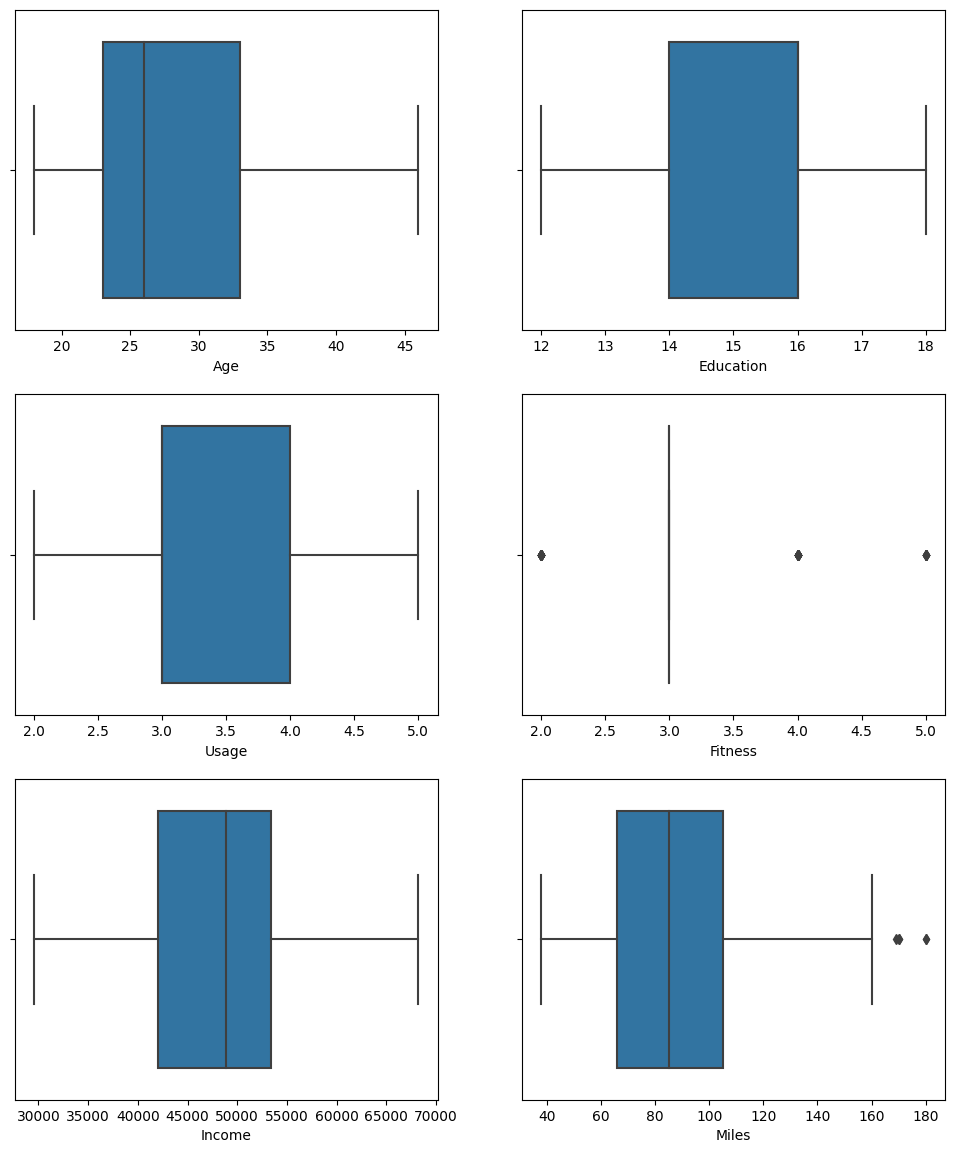

In [32]:
# Find the upper bound and lower bound for every feature 

Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3-Q1
lower_bound = (Q1-1.5*IQR)
upper_bound = (Q3+1.5*IQR)


data = data[~((data < lower_bound) | (data > upper_bound ) ).any(axis = 1)];

#Using Boxplot to display outliers present in the dataset

# Outlier Detection

fig, axis = plt.subplots(nrows=3, ncols=2, figsize=(12, 10))
fig.subplots_adjust(top=1.2)

sns.boxplot(data=data, x="Age", orient='h', ax=axis[0,0])
sns.boxplot(data=data, x="Education", orient='h', ax=axis[0,1])
sns.boxplot(data=data, x="Usage", orient='h', ax=axis[1,0])
sns.boxplot(data=data, x="Fitness", orient='h', ax=axis[1,1])
sns.boxplot(data=data, x="Income", orient='h', ax=axis[2,0])
sns.boxplot(data=data, x="Miles", orient='h', ax=axis[2,1])
plt.show()

After handling outliers in the dataset, we can make the following observations:

1. The range of attributes may have changed, and the distribution of variables may have become more normalized.
2. The relationship between the variables may have become more evident as extreme values no longer dominate the data.
3. Univariate and bivariate plots can provide more meaningful insights into the data.

# Computing Marginal & Conditional Probabilities

In [33]:
# load the data

data = pd.read_csv('./aerofit_treadmill.csv_1639992749').iloc[:, ::-1]
data.head()

,Miles,Income,Fitness,Usage,MaritalStatus,Education,Gender,Age,Product
0,112,29562,4,3,Single,14,Male,18,KP281
1,75,31836,3,2,Single,15,Male,19,KP281
2,66,30699,3,4,Partnered,14,Female,19,KP281
3,85,32973,3,3,Single,12,Male,19,KP281
4,47,35247,2,4,Partnered,13,Male,20,KP281


#### Marginal Probability for each product category 

In [34]:
data['Product'].value_counts(normalize=True)

KP281    0.444444
KP481    0.333333
KP781    0.222222
Name: Product, dtype: float64

#### With all the above steps you can answer questions like: What is the probability of a male customer buying a KP781 treadmill?

In [35]:
pd.crosstab(  data['Gender'], data['Product'], margins= True)


Product,KP281,KP481,KP781,All
Gender,,,,
Female,40,29,7,76
Male,40,31,33,104
All,80,60,40,180


In [38]:
def p_prod_given_gender(gender, print_marginal=False):
    if gender is not "Female" and gender is not "Male":
        return "Invalid gender value."
    
    df1 = pd.crosstab(index=data['Gender'], columns=[data['Product']])

    p_781 = round(df1['KP781'][gender] / df1.loc[gender].sum(), 2)
    p_481 = round(df1['KP481'][gender] / df1.loc[gender].sum(), 2)
    p_281 = round(df1['KP281'][gender] / df1.loc[gender].sum(),2)
    
    if print_marginal:
        print(data['Gender'].value_counts(normalize=True))
        print('\n')
    
    print(f"P(KP781/{gender}): {p_781 }")
    print(f"P(KP481/{gender}): {p_481 }")
    print(f"P(KP281/{gender}): {p_281 }\n")
    
p_prod_given_gender('Male', True)
p_prod_given_gender('Female')

Male      0.577778
Female    0.422222
Name: Gender, dtype: float64


P(KP781/Male): 0.32
P(KP481/Male): 0.3
P(KP281/Male): 0.38

P(KP781/Female): 0.09
P(KP481/Female): 0.38
P(KP281/Female): 0.53



#### What is the probability of a male customer buying a KP781 treadmill? -----> 33/104  0.32

<hr>
<hr>

1. Age vs. Usage: There is a weak negative correlation between age and usage. As age increases, usage decreases. This could indicate that older customers may be less likely to use the fitness center as frequently as younger customers.

2. Fitness vs. Miles: There is a strong positive correlation between fitness and miles. As fitness levels increase, the number of miles walked or run each week also increases. This could indicate that customers who are more fit are more likely to engage in higher levels of physical activity outside of the fitness center.

3. Income vs. Education: There is a positive correlation between income and education. Customers with higher levels of education tend to have higher incomes. This could indicate that education level is a strong predictor of income for customers of the fitness center.

4. Age vs. Income: There is a weak positive correlation between age and income. As age increases, income also tends to increase slightly. This could indicate that older customers may have more established careers and higher earning potential.

5. Usage vs. Income: There is a weak positive correlation between usage and income. Customers with higher incomes tend to use the fitness center more frequently. This could indicate that higher income customers may have more time and resources to devote to fitness and exercise.

6. Gender vs. Income: There is no significant correlation between gender and income. This indicates that gender is not a strong predictor of income for customers of the fitness center.

Business Insights based on Non-Graphical and Visual Analysis
1. Comments on the range of attributes
    1. Age: The age attribute has a range from 18 to 50 years. The majority of the customers fall in the age group of 25-35 years.

    2. Gender: The dataset has two gender categories, male and female. The distribution of gender is unbalanced, with 57% of customers being male and 43% female.

    3. Education: The education attribute ranges from high school (12th) to a graduate degree (21). The majority of customers have some college education, followed by customers with a bachelor's degree (16).

    4. MaritalStatus: The marital status attribute has two categories, married and single. The majority of customers are married.

    5. Usage: The usage attribute ranges from 1 to 7, with 1 indicating less frequent use of the fitness center and 6 indicating more frequent use. The majority of customers fall in the category of 3, which indicates moderate usage.

    6. Fitness: The fitness attribute ranges from 1 to 5, with 1 indicating very low fitness levels and 5 indicating very high fitness levels. The majority of customers fall in the category of 3, indicating moderate fitness levels.

    7. Income: The income attribute ranges from $30,000 to $100,000 per year. The majority of customers have an income between $40,000 to $70,000 per year.

    8. Miles: The miles attribute indicates the average miles a customer walks or runs each week. The range of miles is from 21 to 360 miles, with the majority of customers falling in the range of 100-110 miles per week.
2. Comments on the distribution of the variables and relationship between them
    1. Bivariate analysis:

        1. Age vs. Usage: There is a weak negative correlation between age and usage. As age increases, usage decreases. This could indicate that older customers may be less likely to use the fitness center as frequently as younger customers.

        2. Fitness vs. Miles: There is a strong positive correlation between fitness and miles. As fitness levels increase, the number of miles walked or run each week also increases. This could indicate that customers who are more fit are more likely to engage in higher levels of physical activity outside of the fitness center.

        3. Income vs. Education: There is a positive correlation between income and education. Customers with higher levels of education tend to have higher incomes. This could indicate that education level is a strong predictor of income for customers of the fitness center.

        4. Age vs. Income: There is a weak positive correlation between age and income. As age increases, income also tends to increase slightly. This could indicate that older customers may have more established careers and higher earning potential.

        5. Usage vs. Income: There is a weak positive correlation between usage and income. Customers with higher incomes tend to use the fitness center more frequently. This could indicate that higher income customers may have more time and resources to devote to fitness and exercise.

        6. Gender vs. Income: There is no significant correlation between gender and income. This indicates that gender is not a strong predictor of income for customers of the fitness center.

    2. Univariate analysis:

        1. Age: The age distribution is slightly skewed towards younger customers, with the majority of customers in the age group of 25-35 years.

        2. Gender: The dataset has a unbalanced gender distribution, with 53% of customers being male and 47% female.

        3. Education: The majority of customers have some college education, followed by customers with a bachelor's degree.

        4. MaritalStatus: The majority of customers are single.

        5. Usage: The majority of customers fall in the category of 3, indicating moderate usage of the fitness center.

        6. Fitness: The majority of customers fall in the category of 3, indicating moderate fitness levels.

        7. Income: The majority of customers have an income between $40,000 to $70,000 per year.

        8. Miles: The majority of customers walk or run between 100-110 miles per week.

<br>

    In conclusion, the "Aerofit" dataset provides insights into the characteristics of customers of a fitness center. The analysis indicates that the majority of customers are young, Partnered, and have moderate usage and fitness levels. Customers with higher levels of education tend to have higher incomes. Furthermore, there is a positive correlation between fitness and miles, and a weak negative correlation between age and usage.
<hr>

Here are some actionable <b> recommendations</b> for businesses based on the Aerofit dataset:

1. Target specific age groups: Different age groups may be more likely to purchase Aerofit products depending on their fitness level and income. Analyze the data to determine the most profitable age groups and tailor marketing campaigns to them.

2. Consider both genders: According to the data, both males and females use Aerofit products. Make certain that your marketing materials and product design are appealing to both genders.

3. Consider marital status: Married people are more likely to use Aerofit products for couples' workouts, whereas single people are more concerned with personal fitness. Consider tailoring marketing campaigns to both audiences.

4. Encourage frequent use: According to the data, frequent use of Aerofit products is associated with higher income and fitness levels. Encourage customers to use the products on a regular basis by providing rewards or discounts for doing so.

5. Create premium products: Customers with higher income levels may be willing to pay a higher price for premium Aerofit products. Consider developing and marketing premium products with higher price points in order to capture this market segment.

6. Offer rewards for distance milestones:: Data shows that Aerofit users who log more miles have higher fitness levels and incomes. Consider providing incentives, such as discounts or free products, to customers who reach certain distance-travel milestones.

Businesses can effectively target their marketing efforts and product development to meet the needs and preferences of the Aerofit customer base by taking these actions.